<a href="https://colab.research.google.com/github/areebarshad/multi-asset-portfolio-optimizer/blob/main/notebooks/Final_Model/Portfolio_Optimization_with_Constraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-2720150135.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = "2015-01-01", end = "2025-12-31")['Close']
[*********************100%***********************]  8 of 8 completed
/tmp/ipython-input-1-2720150135.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method = 'ffill').fillna(method = 'bfill')


Data collected and shaped:  (2638, 8)
Ticker            DBC        EWJ         GLD        LQD         TLT  \
Date                                                                  
2015-01-02  15.931045  37.731205  114.080002  84.114632   97.243225   
2015-01-05  15.703832  37.295578  115.800003  84.458557   98.770790   
2015-01-06  15.555271  36.692425  117.120003  84.802513  100.550362   
2015-01-07  15.459144  37.228577  116.430000  84.914856  100.351791   
2015-01-08  15.520316  37.697704  115.940002  84.641113   99.022804   

Ticker            VEA        VNQ        VWO  
Date                                         
2015-01-02  27.559111  54.108124  29.359013  
2015-01-05  26.944885  54.404278  28.891472  
2015-01-06  26.645096  54.943901  28.750462  
2015-01-07  26.930275  55.786251  29.410967  
2015-01-08  27.339739  55.996841  29.908207  
Ticker
DBC    0
EWJ    0
GLD    0
LQD    0
TLT    0
VEA    0
VNQ    0
VWO    0
dtype: int64
0


/tmp/ipython-input-1-2720150135.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data.resample('M').last()


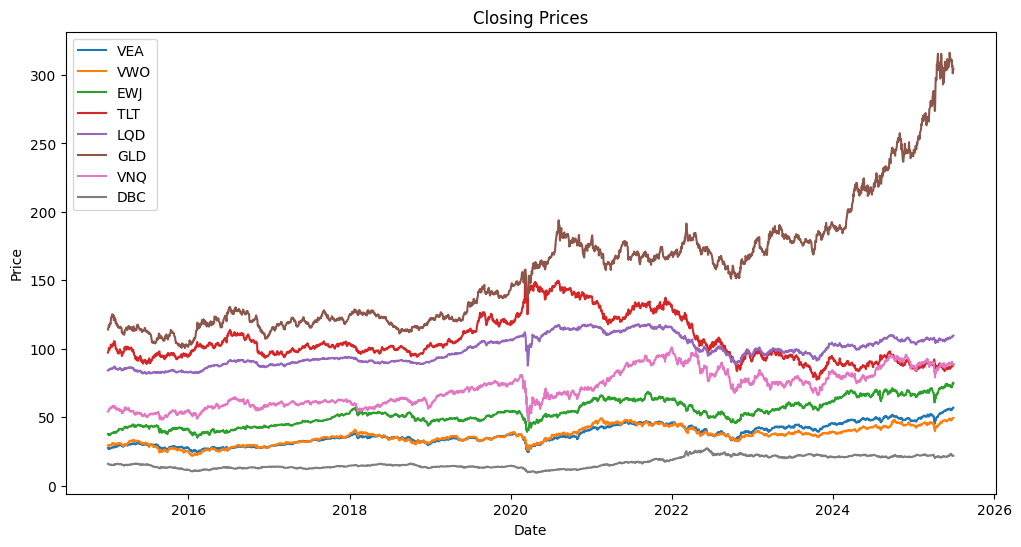

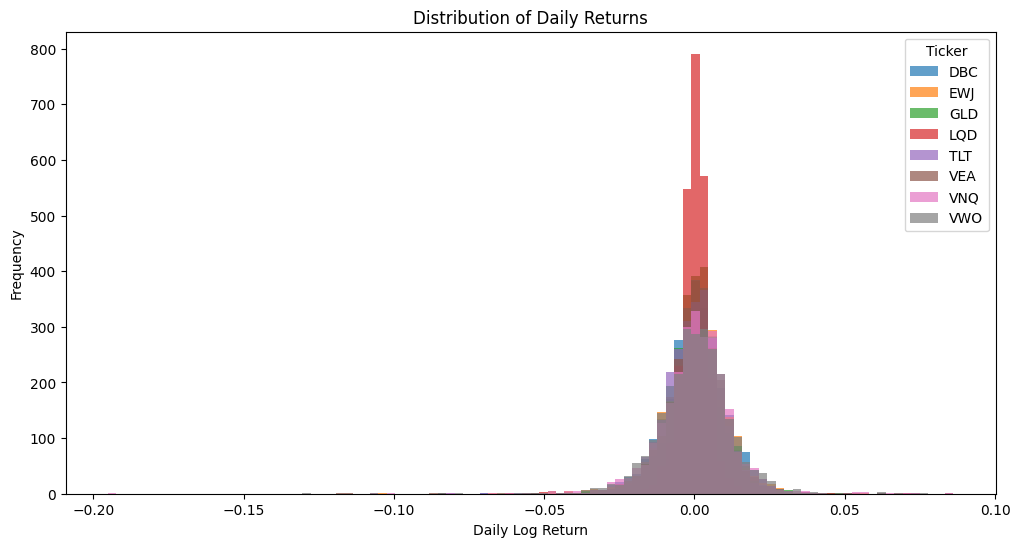

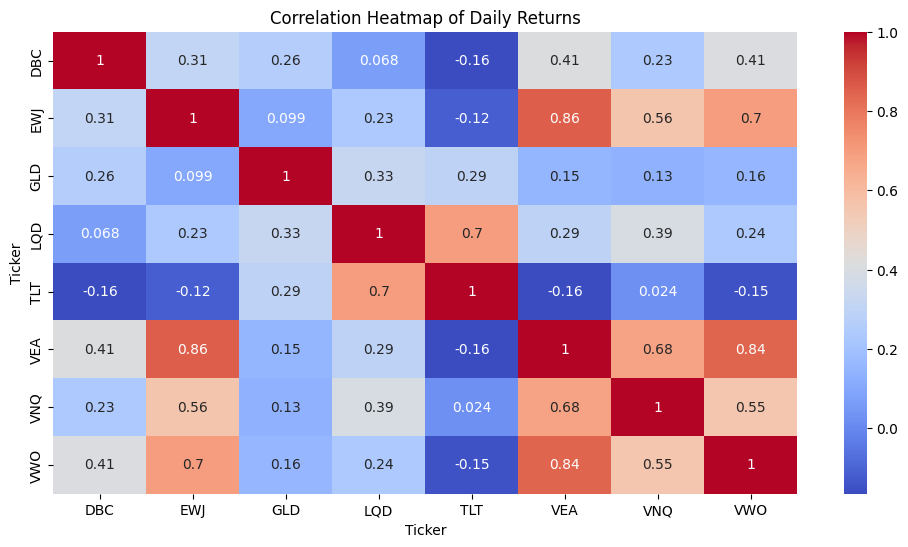

        Mean of Daily Returns  Standard Deviation of Daily Returns  \
Ticker                                                               
DBC                  0.000119                             0.011279   
EWJ                  0.000260                             0.010998   
GLD                  0.000372                             0.009105   
LQD                  0.000100                             0.005403   
TLT                 -0.000037                             0.009611   
VEA                  0.000276                             0.011053   
VNQ                  0.000187                             0.013226   
VWO                  0.000198                             0.012565   

        Annualized Return  Annualized Volatility  
Ticker                                            
DBC              0.029907               0.179049  
EWJ              0.065494               0.174583  
GLD              0.093793               0.144534  
LQD              0.025313               0.08

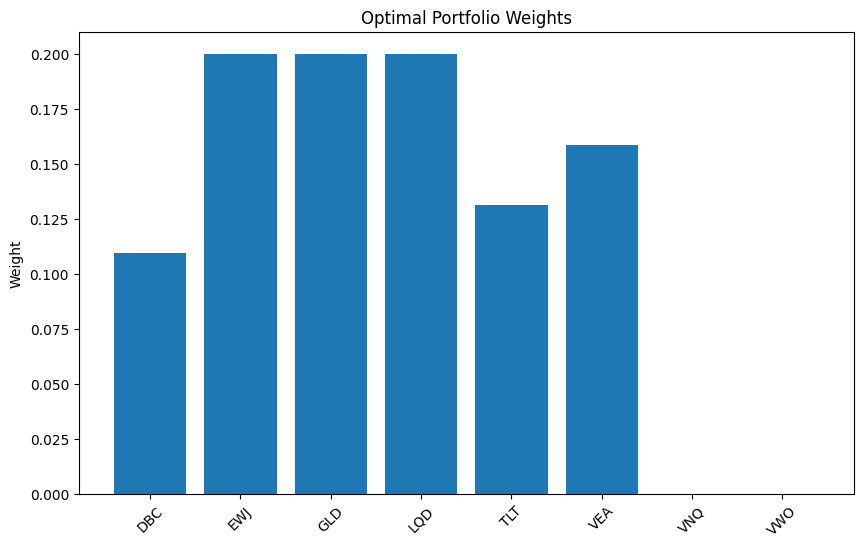

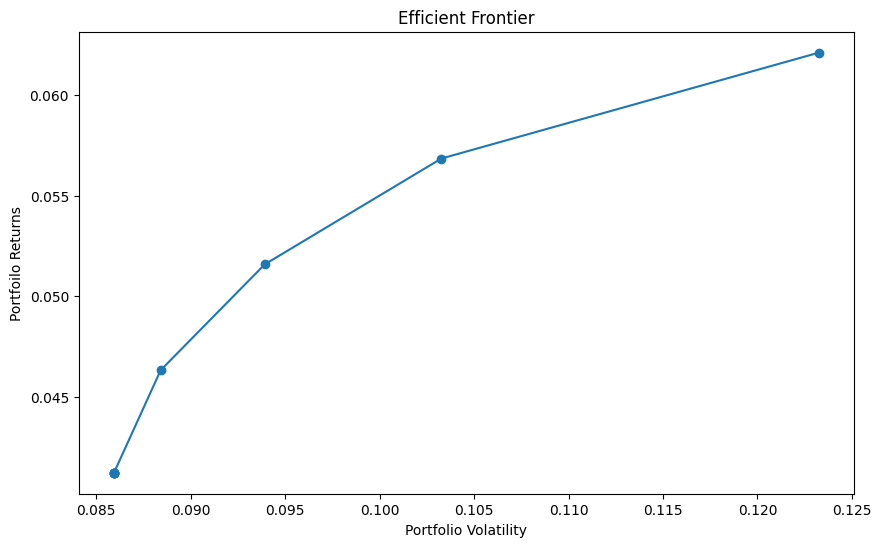

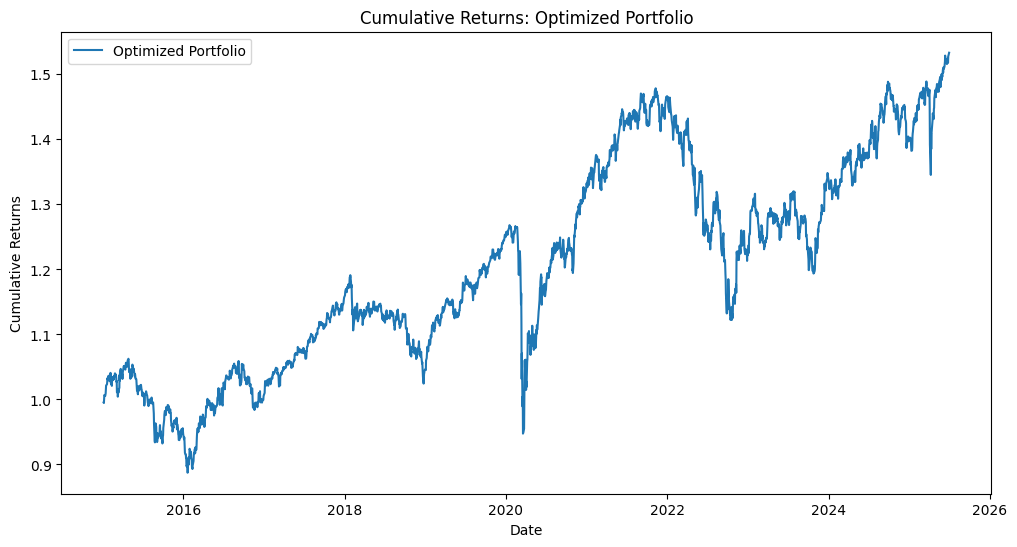

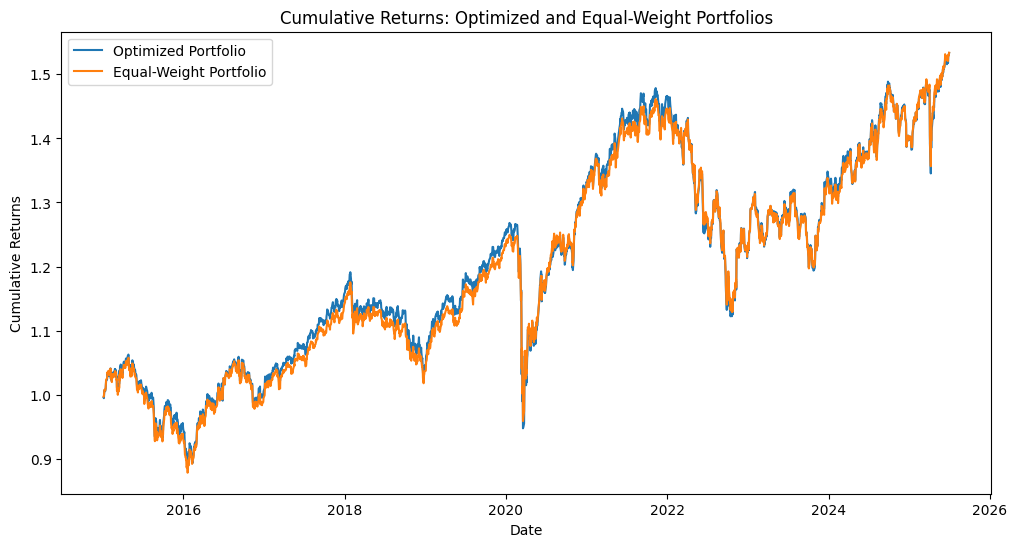

/tmp/ipython-input-1-2720150135.py:215: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download('SPY', start = '2015-01-01', end = '2025-12-31')['Close']
[*********************100%***********************]  1 of 1 completed


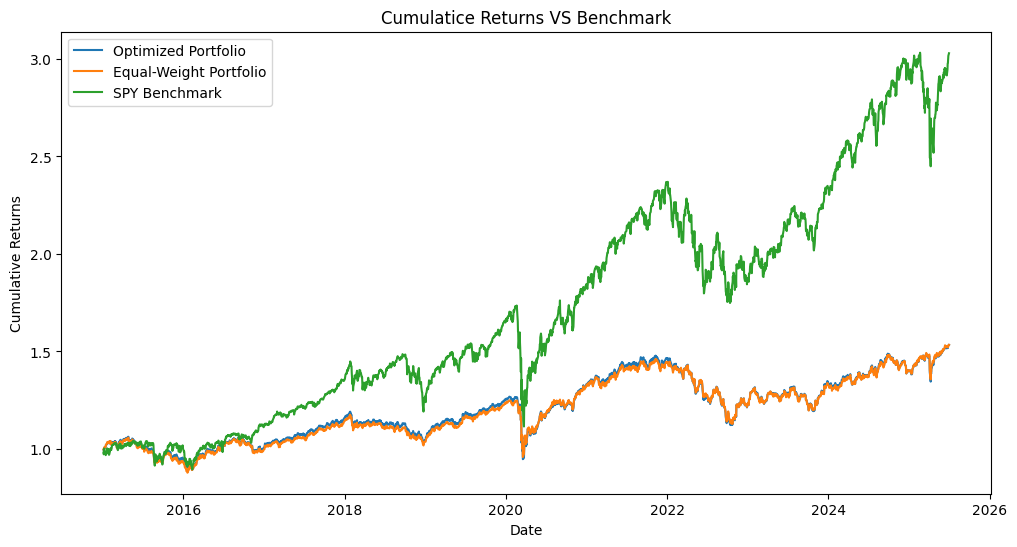

Optimized Portfolio Performance Metrics
Annual Return: 0.0472
Annual Volatility: 0.1120
Sharpe Ratio: 0.4210
Max Drawdown: -25.2882%

Equal-Weight Portfolio Performance Metrics
Annual Return: 0.0464
Annual Volatility: 0.1053
Sharpe Ratio: 0.4412
Max Drawdown: -23.2749%

SPY Benchmark Performance Metrics
Annual Return: 0.1224
Annual Volatility: 0.1810
Sharpe Ratio: 0.6761
Max Drawdown: -35.7459%

Robust Optimal Weights: 
Date: 0.1097
DBC: 0.2000
EWJ: 0.2000
GLD: 0.2000
LQD: 0.1316
TLT: 0.1587
VEA: -0.0000
VNQ: -0.0000
Optimal Weights with Turnover Constraint: 
Date: 0.1000
DBC: 0.1200
EWJ: 0.1300
GLD: 0.1500
LQD: 0.0911
TLT: 0.2000
VEA: 0.1089
VNQ: 0.1000


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cvxpy as cp

#define multi-asset tickers
tickers = ['VEA', 'VWO', 'EWJ', 'TLT', 'LQD', 'GLD', 'VNQ', 'DBC']

#download the closing prices and save to csv
data = yf.download(tickers, start = "2015-01-01", end = "2025-12-31")['Close']
data.to_csv('/content/multiasset_closing_prices.csv')

#output a fitting message
print("Data collected and shaped: ", data.shape)
print(data.head())

#check for missing values
print(data.isnull().sum())

#forward fill then backfill if NaNs remain
data = data.fillna(method = 'ffill').fillna(method = 'bfill')

#confirm no missing data remains
print(data.isnull().sum().sum())

#calculate daily returns and save to csv
daily_returns = np.log(data / data.shift(1)).dropna()
daily_returns.to_csv('/content/multiasset_daily_returns.csv')

#calculate monthly returns
monthly_prices = data.resample('M').last()
monthly_returns = np.log(monthly_prices / monthly_prices.shift(1)).dropna()

#plot the closing prices
plt.figure(figsize = (12, 6))
for ticker in tickers:
  plt.plot(data[ticker], label = ticker)
plt.legend()
plt.title("Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

#plot daily return distributions
daily_returns.plot(kind = 'hist', bins = 100, alpha = 0.7, figsize = (12, 6))
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Log Return")
plt.show()

#plot the correlation heatmap
plt.figure(figsize = (12, 6))
sns.heatmap(daily_returns.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap of Daily Returns")
plt.show()

#calculate the mean and standard deviation of daily returns
stats = pd.DataFrame({'Mean of Daily Returns': daily_returns.mean(),
                      'Standard Deviation of Daily Returns': daily_returns.std()})

#annualize mean and std (assumption: 252 trading days)
stats['Annualized Return'] = stats['Mean of Daily Returns'] * 252
stats['Annualized Volatility'] = stats["Standard Deviation of Daily Returns"] * np.sqrt(252)

#display stats and save to csv
print(stats)
stats.to_csv('/content/multiasset_stats.csv')

#load daily returns
daily_returns = pd.read_csv('/content/multiasset_daily_returns.csv', index_col = 0, parse_dates = True)

#compute annualized mean returns
mean_daily_returns = daily_returns.mean()
annual_returns = mean_daily_returns * 252 #assumption: 252 trading days

#calculate covariance
cov_matrix = daily_returns.cov()
annual_cov_matrix = cov_matrix * 252 #assumption: 252 trading days

#convert to NumPy arrays for optimization
mu = annual_returns.values
sigma = annual_cov_matrix.values

#I have set the following constraints:
#sum of weights = 1
#no short selling (weights >= 0)
#max allocation per asset (<= 20%)

#number of assets
n = len(mu)

#define optimization variables
w = cp.Variable(n)

#define target return
ret_target = 0.05 #5% annual return

#define objective -> minimize portfolio variance
portfolio_variance = cp.quad_form(w, sigma)
objective = cp.Minimize(portfolio_variance)

#define given constraints
constraints = [cp.sum(w) == 1, w >= 0, w <= 0.20, mu @ w >= ret_target]

#formulate problem
problem = cp.Problem(objective, constraints)

#solve the problem
problem.solve()
print("Problem status:", problem.status)

#proceed only if solution exists
if w.value is not None:
    optimal_weights = w.value

    portfolio_return = np.dot(mu, optimal_weights)
    portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(sigma, optimal_weights)))

    print(f"Expected Portfolio Return: {portfolio_return:.4f}")
    print(f"Expected Portfolio Volatility: {portfolio_volatility:.4f}")
else:
    print("Optimization failed. Adjust target return or constraints.")

#plot portfolio weights
plt.figure(figsize = (10, 6))
plt.bar(daily_returns.columns, optimal_weights)
plt.title("Optimal Portfolio Weights")
plt.ylabel("Weight")
plt.xticks(rotation = 45)
plt.show()

#generate efficient frontier
target_returns = np.linspace(0.02, 0.12, 20)

#lists to store results
portfolio_vols = []
portfolio_returns = []

for r in target_returns:
  W = cp.Variable(n)
  objective = cp.Minimize(cp.quad_form(W, sigma))
  constraints = [cp.sum(W) == 1, W >= 0, W <= 0.20, mu @ W >= r]
  prob = cp.Problem(objective, constraints)
  prob.solve()

  if W.value is not None:
    portfolio_vols.append(np.sqrt(np.dot(W.value.T, np.dot(sigma, W.value))))
    portfolio_returns.append(np.dot(mu, W.value))
  else:
    portfolio_vols.append(None)
    portfolio_returns.append(None)

#convert to arrays and filter None values
portfolio_vols = [np.nan if v is None else v for v in portfolio_vols]
portfolio_returns = [np.nan if r is None else r for r in portfolio_returns]

portfolio_vols = np.array(portfolio_vols)
portfolio_returns = np.array(portfolio_returns)

valid = ~np.isnan(portfolio_vols)

#plot efficent frontier
plt.figure(figsize = (10, 6))
plt.plot(portfolio_vols[valid], portfolio_returns[valid], 'o-')
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfoilo Returns")
plt.title("Efficient Frontier")
plt.show()

#load the daily returns
daily_returns = pd.read_csv('/content/multiasset_daily_returns.csv', index_col = 0, parse_dates = True)

#define optimal weights
optimal_weights = np.array([0.10, 0.12, 0.08, 0.15, 0.10, 0.20, 0.15, 0.10])

#ensure that the dimensions match
assert len(optimal_weights) == daily_returns.shape[1], "Weight length does not match number of assets."

#calculate daily portfolio returns
portfolio_daily_returns = daily_returns @ optimal_weights
portoflio_daily_returns = pd.DataFrame(portfolio_daily_returns, index = daily_returns.index,
                                       columns = ["Optimized Portfolio"])

#calculate cumulative returns
cumulative_returns = (1 + portfolio_daily_returns).cumprod()
cumulative_returns.to_csv('/content/multiasset_cum_returns.csv')

#plot cumulative returns
plt.figure(figsize = (12, 6))
plt.plot(cumulative_returns, label = "Optimized Portfolio")
plt.title("Cumulative Returns: Optimized Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

#calculate equal-weight portfolio returns
equal_weight = np.repeat(1 / daily_returns.shape[1], daily_returns.shape[1])
equal_weight_returns = daily_returns @ equal_weight
equal_weight_cum = (1 + equal_weight_returns).cumprod()
equal_weight_cum.to_csv('/content/multiasset_ewc.csv')

#plot with equal-weight returns
plt.figure(figsize = (12, 6))
plt.plot(cumulative_returns, label = "Optimized Portfolio")
plt.plot(equal_weight_cum, label = "Equal-Weight Portfolio")
plt.title("Cumulative Returns: Optimized and Equal-Weight Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

#download benchmark (SPY) data
benchmark = yf.download('SPY', start = '2015-01-01', end = '2025-12-31')['Close']

#calculate the benchmark returns
benchmark_returns = np.log(benchmark / benchmark.shift(1)).dropna()
benchmark_cum = (1 + benchmark_returns).cumprod()
benchmark_cum.to_csv('/content/multiasset_benchmark.csv')

#plot the comparison
plt.figure(figsize = (12,6))
plt.plot(cumulative_returns, label = "Optimized Portfolio")
plt.plot(equal_weight_cum, label = "Equal-Weight Portfolio")
plt.plot(benchmark_cum, label = "SPY Benchmark")
plt.title("Cumulatice Returns VS Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

#calculate the performance metrics
def performance_metrics(returns, name = "Portfolio"):
  if isinstance(returns, pd.DataFrame):
    returns = returns.squeeze()

  ann_return = float(returns.mean() * 252)
  ann_vol = float(returns.std() * np.sqrt(252))
  sharpe_ratio = ann_return / ann_vol
  max_dd = ((1 + returns).cumprod() / (1 + returns).cumprod().cummax() - 1).min()

  print(f"{name} Performance Metrics")
  print(f"Annual Return: {ann_return:.4f}")
  print(f"Annual Volatility: {ann_vol:.4f}")
  print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
  print(f"Max Drawdown: {max_dd:.4%}\n")

#optimized portfolio
performance_metrics(portfolio_daily_returns, "Optimized Portfolio")

#equal-weight portfolio
performance_metrics(equal_weight_returns, "Equal-Weight Portfolio")

#SPY benchmark portfolio
performance_metrics(benchmark_returns, "SPY Benchmark")

#load the daily returns
daily_returns = pd.read_csv('/content/multiasset_daily_returns.csv')

#print robust optimal weights
print("Robust Optimal Weights: ")
for i in range(n):
  print(f"{daily_returns.columns[i]}: {w.value[i]:.4f}")

#assume previous portfolio weights
prev_weights = np.array([0.10, 0.12, 0.08, 0.15, 0.10, 0.20, 0.15, 0.10])

#define turnover limit
turnover_limit = 0.10 #set at 10%

#re-run optimization with turnover constraint
w = cp.Variable(n)

objective = cp.Minimize(cp.quad_form(w, sigma))
constraints = [cp.sum(w) == 1, w >= 0, w <= 0.20,
               cp.norm(w - prev_weights, 1) <= turnover_limit, mu @ w >= ret_target]

problem = cp.Problem(objective, constraints)
problem.solve()

#print optimal weights with turnover constraint
print("Optimal Weights with Turnover Constraint: ")
for i in range(n):
  print(f"{daily_returns.columns[i]}: {w.value[i]:.4f}")